In [46]:
import os
import openpyxl
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel(open('Alcalde_resultado_valpo.xlsx', 'rb'), sheet_name='Datos', engine="openpyxl")

#df_sl = df.iloc[7:]
df_sl_ren = df.rename(columns={'Resultados elección Alcalde':'lista_pacto', 'Unnamed: 1':'partido', 'Unnamed: 2':'votos'})
df_sl_ren2 = df_sl_ren.drop([0,1,2,3,4,5,6,7,9,11,13,15,17,21,22,23,24])
df_sl_ren2.insert(2, "sector", ['C', 'I', 'D', 'C','D','I','C','I'], True)
df_sl_ren2['votos'] = df_sl_ren2['votos'].str.replace('.','').astype('int')
df_sl_ren2



,lista_pacto,partido,sector,votos,Unnamed: 3,Unnamed: 4,Unnamed: 5
8,50 ALEXIS OLIVEROS AGUILAR,IND,C,5870,"3,27",0,-
10,51 CAMILA TATIANA NIETO HERNANDEZ,FA,I,49854,"27,81",0,✔
12,52 JUAN MARCELO VALENZUELA HENRIQUEZ,PDG,D,31036,"17,32",0,-
14,53 MARCELA PATRICIA FIGUEROA KUPFER,IND,C,7451,"4,16",0,-
16,54 RAFAEL GONZALEZ CAMUS,IND,D,35717,"19,93",0,-
18,55 CARLA ELENA MEYER ARANCIBIA,IND,I,33952,"18,94",0,-
19,56 RODRIGO ALEJANDRO DIAZ YUBERO,IND,C,6614,"3,69",0,-
20,57 ZULIANA ALEJANDRA ARAYA GUTIERREZ,IND,I,8746,"4,88",0,-


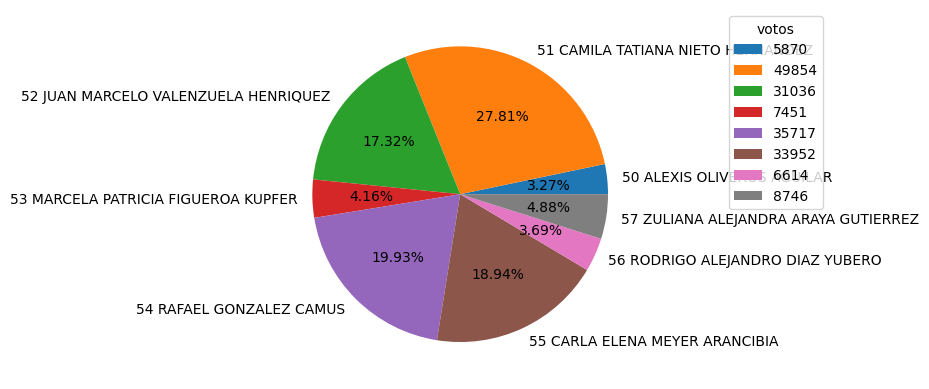

In [113]:
#graf_info = df_sl_ren2.plot(kind='pie', y='lista_pacto', autopct='%1.0f%%')
plt.pie(df_sl_ren2["votos"], autopct='%1.2f%%', labels = df_sl_ren2["lista_pacto"])
plt.legend(df_sl_ren2['votos'], title="votos", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

([<matplotlib.patches.Wedge at 0x2e165517d10>,
 [Text(1.0335336048235326, 0.3765744119035095, 'C'),
  Text(-0.32298733145282565, 1.051512807207303, 'D'),
  Text(-0.05650411609965681, -1.0985478072727635, 'I')],
 [Text(0.5637456026310178, 0.2054042246746415, '11.12%'),
  Text(-0.17617490806517763, 0.5735524402948925, '37.24%'),
  Text(-0.030820426963449166, -0.5992078948760527, '51.64%')])

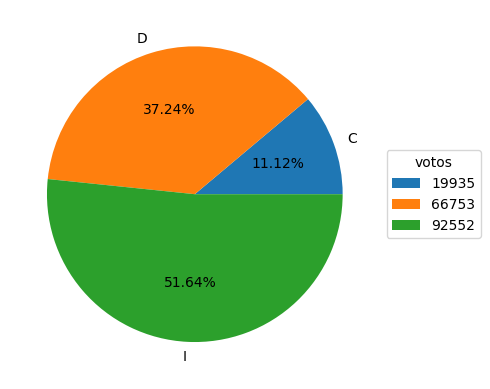

In [114]:
df_fil_sector = df_sl_ren2.groupby(['sector']).agg({'votos':'sum'})
df_fil_sector
plt2=plt.pie(df_fil_sector['votos'], autopct='%1.2f%%', labels=df_fil_sector.index)
plt.legend(df_fil_sector['votos'], title="votos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt2